# KORKULAN DURUM: EKSİK VERİ

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Doğrusal İnterpolasyon

In [2]:
def dogrusal_interpolasyon(x, x1, y1, x2, y2):
    y = y1 + (x - x1) * (y2 - y1) / (x2 - x1)
    return y
x1, y1 = 1, 10
x2, y2 = 3, 15

x_eksik = 2
# Doğrusal interpolasyon
y_eksik = dogrusal_interpolasyon(x_eksik, x1, y1, x2, y2)

print(f'Gün {x_eksik} için tahmini satış değeri: {y_eksik}')

Gün 2 için tahmini satış değeri: 12.5


## Polinom interpolasyon

In [3]:
bilinen_zaman = np.array([1, 2, 3, 5])
bilinen_hiz = np.array([20, 30, 45, 75])

# Polinom interpolasyonu - ikinci dereceden polinom
katsayilar = np.polyfit(bilinen_zaman, bilinen_hiz, 2)
polinom_interpolasyon = np.poly1d(katsayilar)

# Hesaplanan polinom interpolasyon fonksiyonunu kullanarak 4. saniyedeki hızı bulma
istenen_zaman = 4
istenen_hiz = polinom_interpolasyon(istenen_zaman)

print(f'Hız (4. saniye): {istenen_hiz} km/saat')


Hız (4. saniye): 58.86363636363641 km/saat


## Spline İnterpolasyonu

Hız (3. saniye): 40.65624999999999 km/saat
Hız (5. saniye): 60.28124999999999 km/saat
Hız (7. saniye): 54.96875 km/saat


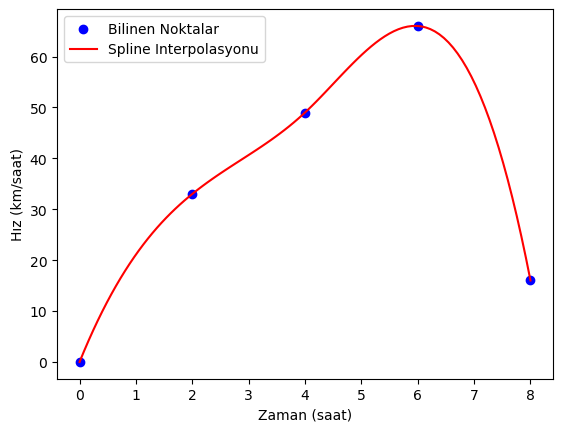

In [4]:
import numpy as np
from scipy.interpolate import splev, splrep
import matplotlib.pyplot as plt
# Bilinen veri noktaları
verilen_zaman = np.array([0, 2, 4, 6,8])  # Saat cinsinden zaman
verilen_hiz = np.array([0, 33, 49, 66,16])  # Km/saat cinsinden hız
# Spline interpolasyonu
tck = splrep(verilen_zaman, verilen_hiz)
saniye_3 = 3
saniye_5 = 5
saniye_7 = 7
hiz_3 = splev(saniye_3, tck)
hiz_5 = splev(saniye_5, tck)
hiz_7 = splev(saniye_7, tck)
# Sonuçları yazdırma
print(f'Hız (3. saniye): {hiz_3} km/saat')
print(f'Hız (5. saniye): {hiz_5} km/saat')
print(f'Hız (7. saniye): {hiz_7} km/saat')
# Yeni zaman değerleri için spline interpolasyonu hesaplama
zaman_deger = np.linspace(min(verilen_zaman), max(verilen_zaman), 100)
hiz_deger = splev(zaman_deger, tck)
# Bilinen veri noktalarını ve spline interpolasyonunu görselleştirme
plt.scatter(verilen_zaman, verilen_hiz, label='Bilinen Noktalar', color='blue')
plt.plot(zaman_deger, hiz_deger, label='Spline Interpolasyonu', color='red')
plt.xlabel('Zaman (saat)')
plt.ylabel('Hız (km/saat)')
plt.legend()
plt.show()

**Karşılaştırma: Polinom İnterpolasyon ve Spline İnterpolasyon**

Spline Interpolasyonu - Hız (3. saniye): 40.65624999999999 km/saat
Spline Interpolasyonu - Hız (5. saniye): 60.28124999999999 km/saat
Polinom Interpolasyonu - Hız (3. saniye): 43.612500000000004 km/saat
Polinom Interpolasyonu - Hız (5. saniye): 63.23750000000004 km/saat


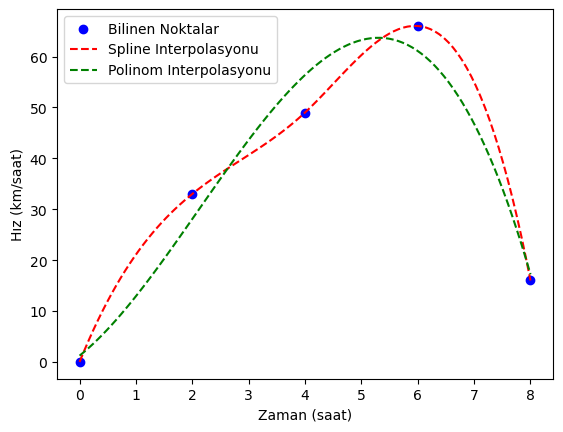

In [5]:
import numpy as np
from scipy.interpolate import splev, splrep
import matplotlib.pyplot as plt

bilinen_zaman = np.array([0, 2, 4, 6, 8])  # Saat cinsinden zaman
bilinen_hiz = np.array([0, 33, 49, 66, 16])  # Km/saat cinsinden hız


tck_spline = splrep(bilinen_zaman, bilinen_hiz)

# Polinom interpolasyonu - üçüncü dereceden polinom
katsayilar = np.polyfit(bilinen_zaman, bilinen_hiz, 3)
p_interpolasyon = np.poly1d(katsayilar)

# Hesaplanan interpolasyon fonksiyonlarını kullanarak 3. ve 5. saniyedeki hızları bulma
saniye_3 = 3
saniye_5 = 5

hiz_3_spline = splev(saniye_3, tck_spline)
hiz_5_spline = splev(saniye_5, tck_spline)

hiz_3_p = p_interpolasyon(saniye_3)
hiz_5_p = p_interpolasyon(saniye_5)

print(f'Spline Interpolasyonu - Hız (3. saniye): {hiz_3_spline} km/saat')
print(f'Spline Interpolasyonu - Hız (5. saniye): {hiz_5_spline} km/saat')

print(f'Polinom Interpolasyonu - Hız (3. saniye): {hiz_3_p} km/saat')
print(f'Polinom Interpolasyonu - Hız (5. saniye): {hiz_5_p} km/saat')

# Bilinen veri noktalarını ve interpolasyonları görselleştirme
zaman = np.linspace(min(bilinen_zaman), max(bilinen_zaman), 100)
hiz_spline = splev(zaman, tck_spline)
hiz_p = p_interpolasyon(zaman)

plt.scatter(bilinen_zaman, bilinen_hiz, label='Bilinen Noktalar', color='blue')
plt.plot(zaman, hiz_spline, label='Spline Interpolasyonu', color='red', linestyle='dashed')
plt.plot(zaman, hiz_p, label='Polinom Interpolasyonu', color='green', linestyle='dashed')
plt.xlabel('Zaman (saat)')
plt.ylabel('Hız (km/saat)')
plt.legend()
plt.show()

## Regresyon Analizi

Tamamlanan Sınav Notları:
[ 40.          50.          60.          65.          75.
  80.          83.92100193  90.          97.02312139 100.        ]


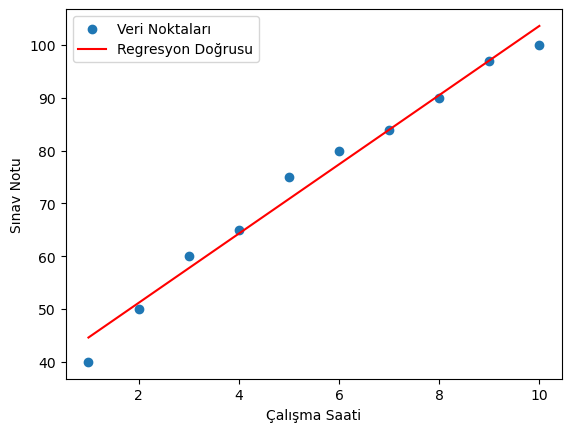

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Veri noktaları
calisilan_saat = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
sinav_not = np.array([40, 50, 60, 65, 75, 80, np.nan, 90, np.nan, 100])
calisilan_saat = calisilan_saat.reshape(-1, 1)
eksik_veri = np.isnan(sinav_not) #eksik degerleri bulma

#regresyon modeli
model = LinearRegression()
model.fit(calisilan_saat[~eksik_veri].reshape(-1, 1), sinav_not[~eksik_veri])

eksik_veri_tahmin = model.predict(calisilan_saat[eksik_veri].reshape(-1, 1))

sinav_not[eksik_veri] = eksik_veri_tahmin # Eksik değerleri doldurma

eğim = model.coef_[0]
kesisim = model.intercept_
regresyon_cizgisi = eğim * calisilan_saat + kesisim

# Veriyi ve regresyon doğrusunu görselleştirme
print("Tamamlanan Sınav Notları:")
print(sinav_not)
plt.scatter(calisilan_saat, sinav_not, label='Veri Noktaları')
plt.plot(calisilan_saat, regresyon_cizgisi, color='red', label='Regresyon Doğrusu')
plt.xlabel('Çalışma Saati')
plt.ylabel('Sınav Notu')
plt.legend()
plt.show()

## Matris Çarpanlama

In [7]:
import numpy as np
from sklearn.decomposition import NMF
puanlar = np.array([
    [5, 4, 0, 0, 0],
    [0, 3, 2, 0, 5],
    [4, 0, 0, 3, 0],
    [0, 0, 4, 0, 3],
])

# Eksik değerlere sahip rastgele bir matris oluşturma
np.random.seed(42)
eksik_deger = np.random.randint(1, 6, size=(4, 5))
puanlar[puanlar == 0] = eksik_deger[puanlar == 0]

model = NMF(n_components=2, init='random', random_state=42)

# Eksik değerleri doldurma
doldurulmus = model.fit_transform(puanlar)

# Tahmin edilmiş matrisi oluşturma
tahmin = np.dot(model.transform(puanlar), model.components_)
print("Gerçek Kullanıcı-Ürün Puan Matrisi:")
print(puanlar)

print("\nEksik Değerleri Doldurulmuş Matris:")
print(doldurulmus.round(2))

print("\nTahmin Edilmiş Matris:")
print(tahmin.round(2))


Gerçek Kullanıcı-Ürün Puan Matrisi:
[[5 4 3 5 5]
 [2 3 2 3 5]
 [4 3 5 3 4]
 [2 4 4 1 3]]

Eksik Değerleri Doldurulmuş Matris:
[[3.1  1.42]
 [2.11 1.05]
 [1.73 2.19]
 [0.71 2.21]]

Tahmin Edilmiş Matris:
[[4.47 3.82 3.05 4.88 5.62]
 [3.1  2.72 2.25 3.32 3.9 ]
 [3.47 3.94 4.45 2.76 4.29]
 [2.34 3.31 4.4  1.17 2.84]]


## Çoklu Değer Atama

In [8]:
import pandas as pd
from fancyimpute import IterativeImputer

# Gerçek veri seti oluşturma
data = {
    'A': [1, 2, 3, np.nan, 5],
    'B': [5, np.nan, 3, 4, 2],
    'C': [1, 2, np.nan, 4, 5],
}

df = pd.DataFrame(data)

# IterativeImputer kullanarak eksik değerleri doldurma
imputer = IterativeImputer(max_iter=10, random_state=42)
df_imputed = imputer.fit_transform(df)

# Sonuçları ekrana yazdırma
print("Orijinal Veri Seti:")
print(df)

print("\nEksik Değerleri Doldurulmuş Veri Seti:")
print(pd.DataFrame(df_imputed, columns=df.columns))


(CVXPY) Jan 20 04:23:51 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: Belirtilen modül bulunamadı.')
(CVXPY) Jan 20 04:23:51 PM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: Belirtilen modül bulunamadı.')
(CVXPY) Jan 20 04:23:51 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: Belirtilen modül bulunamadı.')
Orijinal Veri Seti:
     A    B    C
0  1.0  5.0  1.0
1  2.0  NaN  2.0
2  3.0  3.0  NaN
3  NaN  4.0  4.0
4  5.0  2.0  5.0

Eksik Değerleri Doldurulmuş Veri Seti:
          A         B         C
0  1.000000  5.000000  1.000000
1  2.000000  4.168846  2.000000
2  3.000000  3.000000  2.999995
3  3.999984  4.000000  4.000000
4  5.000000  2.000000  5.000000


## Hot Deck

In [9]:
import pandas as pd
import numpy as np

data = {
    'A': [1, 2, 3, np.nan, 5],
    'B': [5, np.nan, 3, 4, 2],
    'C': [1, 2, np.nan, 4, 5],
}

df = pd.DataFrame(data)

# Hot Deck Imputation
for column in df.columns:
    for i, value in enumerate(df[column]):
        if pd.isna(value):
            # Eksik değeri benzer bir değerle doldur
            similar_values = df[column][df[column].notna()]
            df.at[i, column] = np.random.choice(similar_values)

print("Orijinal Veri Seti:")
print(data)

print("\nEksik Değerleri Doldurulmuş Veri Seti:")
print(df)


Orijinal Veri Seti:
{'A': [1, 2, 3, nan, 5], 'B': [5, nan, 3, 4, 2], 'C': [1, 2, nan, 4, 5]}

Eksik Değerleri Doldurulmuş Veri Seti:
     A    B    C
0  1.0  5.0  1.0
1  2.0  3.0  2.0
2  3.0  3.0  1.0
3  2.0  4.0  4.0
4  5.0  2.0  5.0


## Cold Deck

In [10]:
import pandas as pd
import numpy as np

data = {
    'A': [1, 2, 3, np.nan, 5],
    'B': [5, np.nan, 3, 4, 2],
    'C': [1, 2, np.nan, 4, 5],
}

df = pd.DataFrame(data)

# Cold Deck Imputation
referanslar = {'A': 10, 'B': 20, 'C': 30}

for column in df.columns:
    for i, value in enumerate(df[column]):
        if pd.isna(value):
            # Eksik değeri referans değeri ile doldur
            df.at[i, column] = referanslar.get(column, np.nan)

print("Orijinal Veri Seti:")
print(data)

print("\nEksik Değerleri Doldurulmuş Veri Seti:")
print(df)


Orijinal Veri Seti:
{'A': [1, 2, 3, nan, 5], 'B': [5, nan, 3, 4, 2], 'C': [1, 2, nan, 4, 5]}

Eksik Değerleri Doldurulmuş Veri Seti:
      A     B     C
0   1.0   5.0   1.0
1   2.0  20.0   2.0
2   3.0   3.0  30.0
3  10.0   4.0   4.0
4   5.0   2.0   5.0


## Ortalama-Mod-Medyan Ataması

In [11]:
import pandas as pd
import numpy as np

data = {
    'X': [1, 2, 3, np.nan, 5],
    'Y': [5, 4, 3, np.nan, 1],
    'Z': [np.nan, 2, 4, 3, 1],
    'W': [1, 2, np.nan, 4, 5],
}

df = pd.DataFrame(data)

# Eksik değerleri doldurmak için Mean, Mode, Median Imputation
ortalama_doldurma = df.fillna(df.mean())
mod_doldurma = df.apply(lambda column: column.fillna(column.mode()[0]))
medyan_doldurma = df.fillna(df.median())

print(" Veri Seti:")
print(df)
print("\nOrtalama ile (Veri Seti):")
print(ortalama_doldurma)
print("\nMod ile (Veri Seti):")
print(mod_doldurma)
print("\nMedyan ile (Veri Seti):")
print(medyan_doldurma)

 Veri Seti:
     X    Y    Z    W
0  1.0  5.0  NaN  1.0
1  2.0  4.0  2.0  2.0
2  3.0  3.0  4.0  NaN
3  NaN  NaN  3.0  4.0
4  5.0  1.0  1.0  5.0

Ortalama ile (Veri Seti):
      X     Y    Z    W
0  1.00  5.00  2.5  1.0
1  2.00  4.00  2.0  2.0
2  3.00  3.00  4.0  3.0
3  2.75  3.25  3.0  4.0
4  5.00  1.00  1.0  5.0

Mod ile (Veri Seti):
     X    Y    Z    W
0  1.0  5.0  1.0  1.0
1  2.0  4.0  2.0  2.0
2  3.0  3.0  4.0  1.0
3  1.0  1.0  3.0  4.0
4  5.0  1.0  1.0  5.0

Medyan ile (Veri Seti):
     X    Y    Z    W
0  1.0  5.0  2.5  1.0
1  2.0  4.0  2.0  2.0
2  3.0  3.0  4.0  3.0
3  2.5  3.5  3.0  4.0
4  5.0  1.0  1.0  5.0


## Interpolating Moving Averages

In [12]:
import pandas as pd
data = {
    'Tarih': pd.date_range(start='2024-01-01', end='2024-01-10'),
    'Sıcaklık': [15, 18, 20, None, 22, 19, 23, None, 25, 24],
}

df = pd.DataFrame(data)

# Eksik değerleri Interpolating Moving Averages ile doldurma
df['Yeni Sıcaklık'] = df['Sıcaklık'].interpolate()

print("Orijinal Veri Seti:")
print(df[['Tarih', 'Sıcaklık']])

print("\nInterpolating Moving Averages ile Eksik Değerleri Doldurulmuş Veri Seti:")
print(df[['Tarih', 'Yeni Sıcaklık']])


Orijinal Veri Seti:
       Tarih  Sıcaklık
0 2024-01-01      15.0
1 2024-01-02      18.0
2 2024-01-03      20.0
3 2024-01-04       NaN
4 2024-01-05      22.0
5 2024-01-06      19.0
6 2024-01-07      23.0
7 2024-01-08       NaN
8 2024-01-09      25.0
9 2024-01-10      24.0

Interpolating Moving Averages ile Eksik Değerleri Doldurulmuş Veri Seti:
       Tarih  Yeni Sıcaklık
0 2024-01-01           15.0
1 2024-01-02           18.0
2 2024-01-03           20.0
3 2024-01-04           21.0
4 2024-01-05           22.0
5 2024-01-06           19.0
6 2024-01-07           23.0
7 2024-01-08           24.0
8 2024-01-09           25.0
9 2024-01-10           24.0


## Data Augmentation

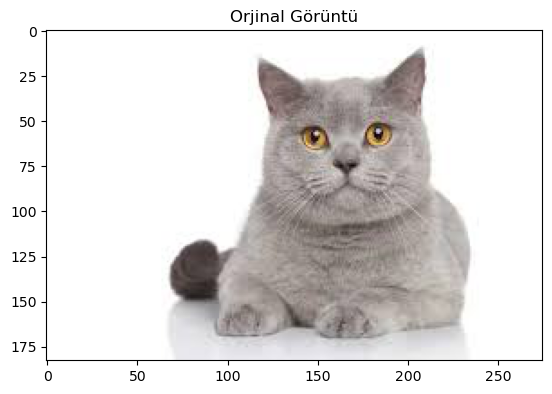

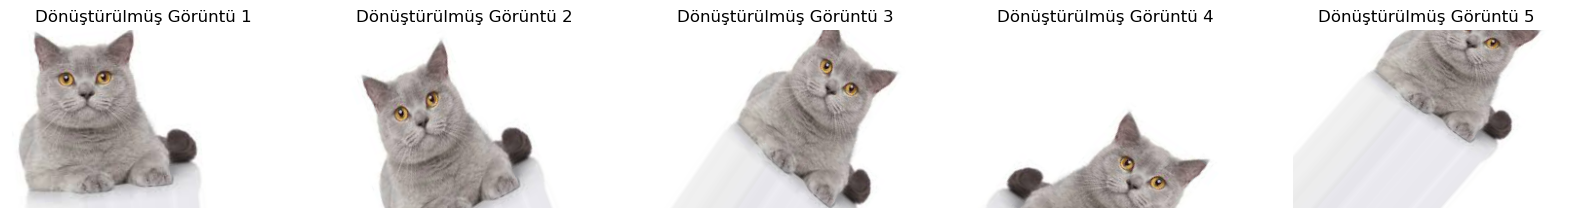

In [13]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
# Örnek bir görüntü yükleyelim (bu örnekte bir kedi görüntüsü)
dosya_yolu = 'C:/Users/tahat/OneDrive/Masaüstü/indir.jpeg'
resim = plt.imread(dosya_yolu)

# Görüntüyü gösterelim
plt.imshow(resim)
plt.title('Orjinal Görüntü')
plt.show()

# Görüntüyü dönüştürecek bir ImageDataGenerator oluşturalım
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Görüntüyü dönüştürelim ve gösterelim
resim = np.expand_dims(resim, axis=0)
artirilmis_goruntu_olusturucu = datagen.flow(resim, batch_size=1)

yeni_goruntuler = [next(artirilmis_goruntu_olusturucu)[0].astype(np.uint8) for i in range(5)]

# Dönüştürülmüş görüntüleri gösterelim
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, aug_img in enumerate(yeni_goruntuler):
    axes[i].imshow(aug_img)
    axes[i].set_title(f'Dönüştürülmüş Görüntü {i+1}')
    axes[i].axis('off')

plt.show()

## Bootsrap

In [14]:
import numpy as np

# Örnek bir veri seti oluşturalım (10 örnek)
data = np.array([1, 2, 3, np.nan, 5, 6, np.nan, 8, 9, 10])

# Bootstrap Imputation için bir fonksiyon
def orneklem_atama(data, num_iterations=10):
    atanan_degerler = []
    gozlenen_degerler = data[~np.isnan(data)]  # Gözlemlenen değerler

    for _ in range(num_iterations):
        orneklem = np.random.choice(gozlenen_degerler, size=len(gozlenen_degerler), replace=True)
        atanan_deger = np.nanmean(orneklem)  # Ortalama ile doldurduk, başka yöntemler de kullanılabilir
        atanan_degerler.append(atanan_deger)

    return atanan_degerler

# Bootstrap Imputation uygulama
atanan_degerler = orneklem_ata(data)

# Ortalama ve orijinal veri setini ekrana yazdırma
print("Orijinal Veri Seti:")
print(data)

print("\nBootstrap Imputation ile Doldurulmuş Değerler:")
print(atanan_degerler)


NameError: name 'orneklem_ata' is not defined